# Homework Solution - Regression
##Team:
#### Avinska Valeria Gunawan
#### Dwirany Dian Audry Sinaga
#### Ichwan
#### Mega Dwi Astuti
#### Talenta Nanda


- Lakukan EDA dan preprocessing sederhana (30 point)
- Jelaskan Fitur mana yang sebaiknya digunakan dari hasil EDA?
- Lakukan feature engineering (10 point) 
- Apakah ada feature tambahan lain yang mendukung? Jelaskan mengapa menggunakan feature tersebut.
- Lakukan training model & prediksi views sebagai variabel target (40 point)
- Dapat menggunakan model linear regression ataupun algoritma lainnya (30 point)
- Lakukan tuning hyperparameter, cari mana model yang paling baik (10 point)
- Evaluasi model dengan metrics RMSE dan R2
 (20 point)
- Jelaskan & berikan analisis mengapa memilih model tersebut sebagai model akhir 
yang digunakan.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


# Data Pre-Processing

## Load Data

In [ ]:
df = pd.read_excel('youtube_statistics.xlsx')
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

## Duplicate Values

In [ ]:
df.duplicated().sum()

4229

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32562 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32562 non-null  object        
 1   title                   32562 non-null  object        
 2   channel_title           32562 non-null  object        
 3   category_id             32562 non-null  int64         
 4   publish_time            32562 non-null  object        
 5   tags                    32562 non-null  object        
 6   views                   32562 non-null  int64         
 7   likes                   32562 non-null  int64         
 8   dislikes                32562 non-null  int64         
 9   comment_count           32562 non-null  int64         
 10  comments_disabled       32562 non-null  bool          
 11  ratings_disabled        32562 non-null  bool          
 12  video_error_or_removed  32562 non-null  bool  

Jumlah data yang terduplikat pada semua kolom sejumlah 4229 data dan semuanya didrop

In [ ]:
df = df.drop_duplicates(subset=['title','channel_title','publish_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 36740
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           16493 non-null  object        
 1   title                   16493 non-null  object        
 2   channel_title           16493 non-null  object        
 3   category_id             16493 non-null  int64         
 4   publish_time            16493 non-null  object        
 5   tags                    16493 non-null  object        
 6   views                   16493 non-null  int64         
 7   likes                   16493 non-null  int64         
 8   dislikes                16493 non-null  int64         
 9   comment_count           16493 non-null  int64         
 10  comments_disabled       16493 non-null  bool          
 11  ratings_disabled        16493 non-null  bool          
 12  video_error_or_removed  16493 non-null  bool  

Pengecekan duplikat dilakukan dengan mengecek judul yang sama dan setelah mendrop judul yang sama jumlah baris menjadi 16493 dan 18 kolom

In [ ]:
nums=['category_id','views', 'likes','dislikes','comment_count','No_tags','desc_len','len_title']
df[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,16493.000000,1.649300e+04,1.649300e+04,16493.000000,16493.000000,16493.000000,16493.000000,16493.000000
mean,22.343843,4.158280e+05,1.087755e+04,595.672043,1198.352756,18.684108,900.295277,70.895531
std,5.947039,1.140095e+06,4.585858e+04,4305.765141,7655.755659,10.183718,789.532222,21.695790
min,1.000000,4.024000e+03,0.000000e+00,0.000000,0.000000,1.000000,3.000000,5.000000
25%,23.000000,7.215400e+04,5.000000e+02,60.000000,42.000000,11.000000,363.000000,55.000000
50%,24.000000,1.552200e+05,1.543000e+03,155.000000,169.000000,18.000000,670.000000,74.000000
75%,25.000000,3.536610e+05,5.144000e+03,426.000000,602.000000,25.000000,1215.000000,90.000000
max,43.000000,3.773628e+07,1.735914e+06,483933.000000,461956.000000,72.000000,5135.000000,100.000000


In [ ]:
cat=['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed', 'description','publish_date']
df[cat].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,16493,16493,16493,16493,16493,16493,16493,16493,16464,16493
unique,205,16431,1390,12375,12223,2,2,2,13333,219
top,2017-11-14,Kasthooriman || General Promo || Mon to Sat at...,Study IQ education,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-01-02 00:00:00
freq,192,6,172,128,581,15909,16097,16492,102,122
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


Dari describe dan missing value di atas, terdapat beberapa kolom yang perlu didrop karena tidak mendukung dalam proses selanjutnya:
- title tags, description karena memiliki variasi/kategori yang banyak

In [ ]:
dfx = df.drop(columns = ['title','description','tags'])
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 36740
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           16493 non-null  object        
 1   channel_title           16493 non-null  object        
 2   category_id             16493 non-null  int64         
 3   publish_time            16493 non-null  object        
 4   views                   16493 non-null  int64         
 5   likes                   16493 non-null  int64         
 6   dislikes                16493 non-null  int64         
 7   comment_count           16493 non-null  int64         
 8   comments_disabled       16493 non-null  bool          
 9   ratings_disabled        16493 non-null  bool          
 10  video_error_or_removed  16493 non-null  bool          
 11  No_tags                 16493 non-null  int64         
 12  desc_len                16493 non-null  int64 

In [ ]:
## memperbaharui fitur categorical
cat=['trending_date','channel_title','publish_time','comments_disabled','ratings_disabled','video_error_or_removed','publish_date']
dfx[cat].describe()

,trending_date,channel_title,publish_time,comments_disabled,ratings_disabled,video_error_or_removed,publish_date
count,16493,16493,16493,16493,16493,16493,16493
unique,205,1390,12375,2,2,2,219
top,2017-11-14,Study IQ education,04:30:00,False,False,False,2018-01-02 00:00:00
freq,192,172,128,15909,16097,16492,122
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


## Missing Value

Karena sudah dilakukan pre-processing menghapus kolom yang tidak diperlukan, jumlah missing values sudah tidak ada

In [ ]:
dfx.isna().sum()

trending_date             0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

In [ ]:
dfx.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,16493.000000,1.649300e+04,1.649300e+04,16493.000000,16493.000000,16493.000000,16493.000000,16493.000000
mean,22.343843,4.158280e+05,1.087755e+04,595.672043,1198.352756,18.684108,900.295277,70.895531
std,5.947039,1.140095e+06,4.585858e+04,4305.765141,7655.755659,10.183718,789.532222,21.695790
min,1.000000,4.024000e+03,0.000000e+00,0.000000,0.000000,1.000000,3.000000,5.000000
25%,23.000000,7.215400e+04,5.000000e+02,60.000000,42.000000,11.000000,363.000000,55.000000
50%,24.000000,1.552200e+05,1.543000e+03,155.000000,169.000000,18.000000,670.000000,74.000000
75%,25.000000,3.536610e+05,5.144000e+03,426.000000,602.000000,25.000000,1215.000000,90.000000
max,43.000000,3.773628e+07,1.735914e+06,483933.000000,461956.000000,72.000000,5135.000000,100.000000


## Outliers

Dilihat dari mean dan median, terlihat hampir seluruh feature nilai mean dan medianya berjarak cukup jauh, karena itu semua feature akan dihandle outliersnya.

In [ ]:
dfx[nums].head()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
0,1,1096327,33966,798,882,15,920,81
1,25,590101,735,904,0,19,2232,58
2,24,473988,2011,243,149,14,482,58
3,23,1242680,70353,1624,2684,20,263,30
4,24,464015,492,293,66,11,753,88


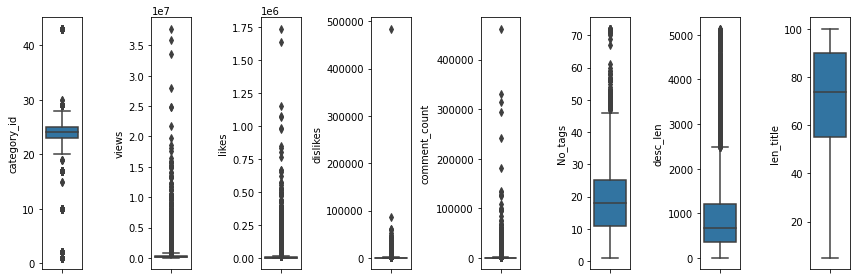

In [ ]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y = dfx[nums[i]], orient='v')
    plt.tight_layout()

Pada bagian ini tidak dilakukan handling outliers dikarenakan data outliers sangat banyak, tetapi masih bernilai valid sesuai dengan jenis datanya. Sebagai contoh: outliers pada data view masih valid karena jumlah penonton sebuah video masih memungkinkan untuk bernilai sangat tinggi

# Feature Engineering

In [ ]:
dfa = dfx.copy()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 36740
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           16493 non-null  object        
 1   channel_title           16493 non-null  object        
 2   category_id             16493 non-null  int64         
 3   publish_time            16493 non-null  object        
 4   views                   16493 non-null  int64         
 5   likes                   16493 non-null  int64         
 6   dislikes                16493 non-null  int64         
 7   comment_count           16493 non-null  int64         
 8   comments_disabled       16493 non-null  bool          
 9   ratings_disabled        16493 non-null  bool          
 10  video_error_or_removed  16493 non-null  bool          
 11  No_tags                 16493 non-null  int64         
 12  desc_len                16493 non-null  int64 

In [ ]:
dfa[cat] = dfa[cat].astype('category')

In [ ]:
dfa_cat=dfa.select_dtypes(include='category')
dfa_cat.head(5)

,trending_date,channel_title,publish_time,comments_disabled,ratings_disabled,video_error_or_removed,publish_date
0,2017-11-14,Lokdhun Punjabi,12:20:39,False,False,False,2017-11-12
1,2017-11-14,HJ NEWS,05:43:56,True,False,False,2017-11-13
2,2017-11-14,TFPC,15:48:08,False,False,False,2017-11-12
3,2017-11-14,Eruma Saani,07:08:48,False,False,False,2017-11-12
4,2017-11-14,Filmylooks,01:14:16,False,False,False,2017-11-13


In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfa_num=dfa.select_dtypes(include=numeric)
dfa_num.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,16493.0,22.343843,5.947039e+00,1.0,23.0,24.0,25.0,43.0
views,16493.0,415827.980719,1.140095e+06,4024.0,72154.0,155220.0,353661.0,37736281.0
likes,16493.0,10877.545140,4.585858e+04,0.0,500.0,1543.0,5144.0,1735914.0
dislikes,16493.0,595.672043,4.305765e+03,0.0,60.0,155.0,426.0,483933.0
comment_count,16493.0,1198.352756,7.655756e+03,0.0,42.0,169.0,602.0,461956.0
No_tags,16493.0,18.684108,1.018372e+01,1.0,11.0,18.0,25.0,72.0
desc_len,16493.0,900.295277,7.895322e+02,3.0,363.0,670.0,1215.0,5135.0
len_title,16493.0,70.895531,2.169579e+01,5.0,55.0,74.0,90.0,100.0


In [ ]:
q1 = dfa['views'].quantile(q=0.25)
q4 = dfa['views'].quantile(q=0.75)

In [ ]:
def segment(x):
  if x['views'] >= q4:
    segment = 'high'
  elif x['views'] >= q1 and x['views'] < q4:
    segment = 'mid'
  else:
    segment = 'low'
  return segment

In [ ]:
dfa['segment_views'] = dfa.apply(lambda x: segment(x), axis=1)

In [ ]:
dfa.head()

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,segment_views
0,2017-11-14,Lokdhun Punjabi,1,12:20:39,1096327,33966,798,882,False,False,False,15,920,81,2017-11-12,high
1,2017-11-14,HJ NEWS,25,05:43:56,590101,735,904,0,True,False,False,19,2232,58,2017-11-13,high
2,2017-11-14,TFPC,24,15:48:08,473988,2011,243,149,False,False,False,14,482,58,2017-11-12,high
3,2017-11-14,Eruma Saani,23,07:08:48,1242680,70353,1624,2684,False,False,False,20,263,30,2017-11-12,high
4,2017-11-14,Filmylooks,24,01:14:16,464015,492,293,66,False,False,False,11,753,88,2017-11-13,high


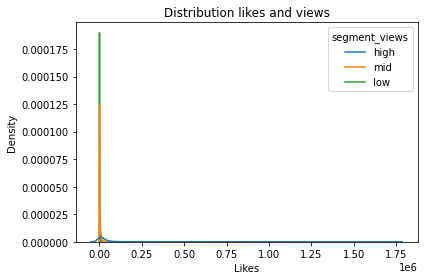

In [ ]:
ax = sns.kdeplot(x = 'likes', data=dfa, hue = 'segment_views')
ax.set_title("Distribution likes and views")
ax.set_xlabel("Likes")
plt.tight_layout()

In [ ]:
def segment(x):
  if x['publish_time'] >= '04:00:00' and x['publish_time'] < '10:00:00':
    segment = 'morning'
  elif x['publish_time'] >= '10:00:00' and x['publish_time'] < '14:00:00':
    segment = 'noon'
  elif x['publish_time'] >= '14:00:00' and x['publish_time'] < '18:00:00':
    segment = 'afternoon' 
  elif x['publish_time'] >= '18:00:00' and x['publish_time'] < '24:00:00':
    segment = 'night'   
  else:
    segment = 'early morning'
  return segment

In [ ]:
dfa['segment_publish_time'] = dfa.apply(lambda x: segment(x), axis=1)

In [ ]:
dfa.sample(5)

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,segment_views,segment_publish_time
34968,2018-06-04,Zee Kannada,24,14:43:14,20937,50,4,2,False,False,False,10,1161,71,2018-06-02,low,afternoon
4459,2017-12-07,pink tech,22,15:30:01,21988,109,10,7,False,False,False,50,625,100,2017-12-05,low,afternoon
18166,2018-02-24,mallemalatv,24,06:16:35,844368,4912,410,256,False,False,False,21,580,96,2018-02-23,high,morning
18648,2018-02-26,Univrsal Media Pro,22,05:34:48,263353,682,203,40,False,False,False,25,1444,98,2018-02-25,mid,morning
23551,2018-03-28,Harsh Beniwal,23,14:42:23,1363014,153174,5071,21388,False,False,False,16,609,61,2018-03-27,high,afternoon


In [ ]:
dfa['trending_date'] = pd.to_datetime(dfa['trending_date'])
dfa['trending_month'] = dfa['trending_date'].apply(lambda x: x.strftime('%B-%Y'))
dfa['trending_day'] = dfa['trending_date'].apply(lambda x: x.strftime('%d'))

In [ ]:
dfa['publish_date'] = pd.to_datetime(dfa['publish_date'])
dfa['publish_month'] = dfa['publish_date'].apply(lambda x: x.strftime('%B-%Y'))
dfa['publish_day'] = dfa['publish_date'].apply(lambda x: x.strftime('%d'))

In [ ]:
dfa['publish_time'] = pd.to_datetime(dfa['publish_time'])
dfa['publish_hour'] = dfa['publish_time'].dt.hour

In [ ]:
# day_names = dfa.publish_date.dt.day_name().to_frame()
# day_names['is_weekend'] = day_names['publish_date'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0).to_frame()
# day_names.columns = ['publish_day_name', 'is_weekend']

In [ ]:
# day_names2 = dfa.trending_date.dt.day_name().to_frame()
# day_names2['is_weekend2'] = day_names2['trending_date'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0).to_frame()
# day_names2.columns = ['trending_day_name', 'is_weekend']

In [ ]:
# dfa = pd.concat([dfa, day_names, day_names2], axis=1)
# dfa.head()

# EDA

Berdasarkan hasil pencarian grup, standar yang membuat sebuah video trending di youtube adalah:
1. Durasi menonton
2. Rata-rata persentase views
3. Durasi video
4. Persentase penonton yang melihat video lalu keluar
5. Menonton ulang
6. Jumlah likes, dislikes
7. Jumlah viewers unik
8. Jumlah views per viewers unik
9. Darimana audience menonton (termasuk dari luar youtube)

sumber: 

https://support.google.com/youtube/answer/7239739?hl=en

https://blog.hubspot.com/marketing/youtube-analytics


Maka dari itu, kami akan mendrop feature yang kami rasa tidak perlu

<Figure size 1080x1080 with 0 Axes>

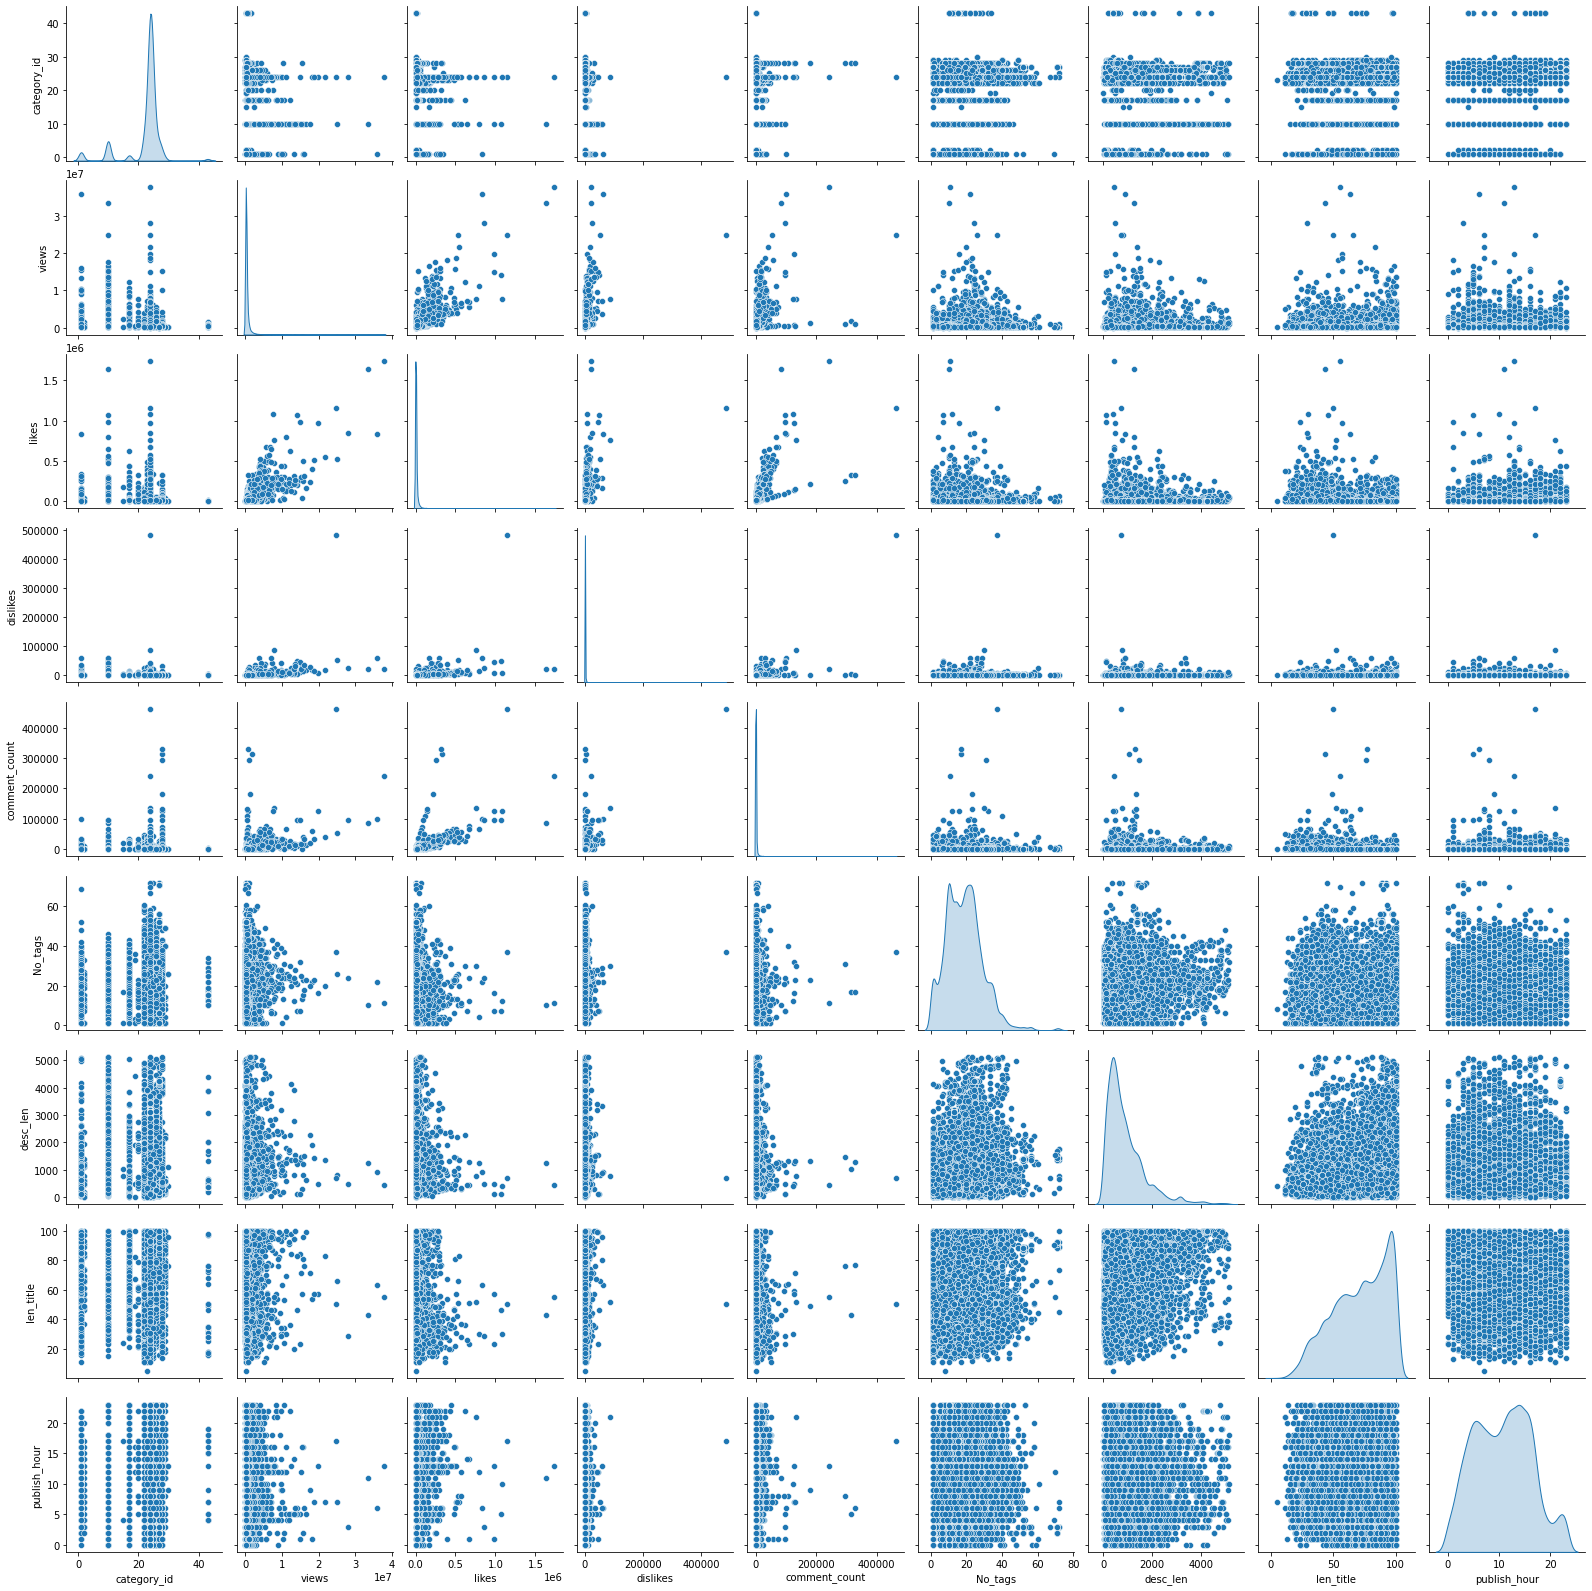

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(dfa, diag_kind='kde')

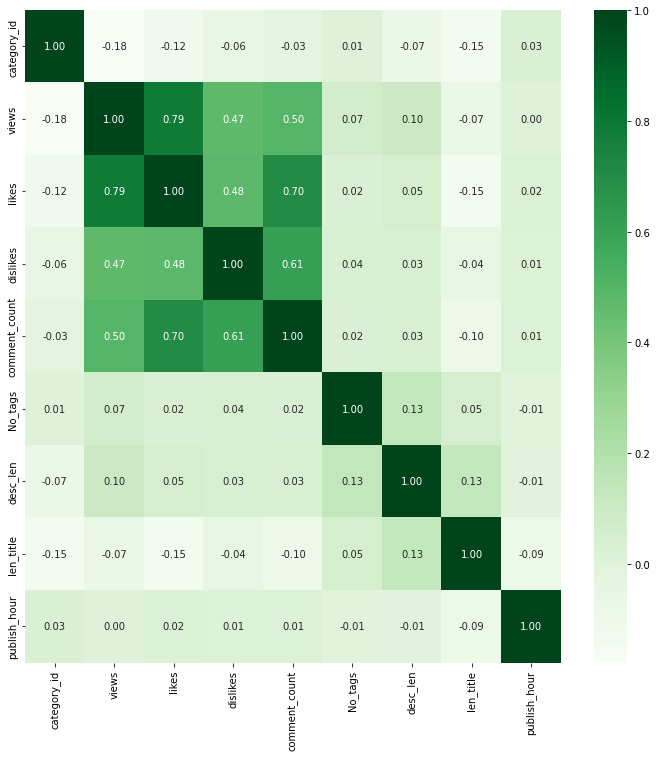

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfa.corr(), cmap='Greens', annot=True, fmt='.2f')

In [ ]:
dfa = dfa.drop(columns = ['No_tags', 'ratings_disabled', 'video_error_or_removed', 'desc_len', 'len_title'])

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 36740
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   trending_date         16493 non-null  category      
 1   channel_title         16493 non-null  category      
 2   category_id           16493 non-null  int64         
 3   publish_time          16493 non-null  datetime64[ns]
 4   views                 16493 non-null  int64         
 5   likes                 16493 non-null  int64         
 6   dislikes              16493 non-null  int64         
 7   comment_count         16493 non-null  int64         
 8   comments_disabled     16493 non-null  category      
 9   publish_date          16493 non-null  category      
 10  segment_views         16493 non-null  object        
 11  segment_publish_time  16493 non-null  object        
 12  trending_month        16493 non-null  object        
 13  trending_day    

In [ ]:
catnew = ['segment_views','segment_publish_time','trending_month','trending_day','publish_month','publish_day']
dfa[catnew] = dfa[catnew].astype('category')

In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfa_num=dfa.select_dtypes(include=numeric)
dfa_num.head()

,category_id,views,likes,dislikes,comment_count,publish_hour
0,1,1096327,33966,798,882,12
1,25,590101,735,904,0,5
2,24,473988,2011,243,149,15
3,23,1242680,70353,1624,2684,7
4,24,464015,492,293,66,1


In [ ]:
dfa_num.describe()

,category_id,views,likes,dislikes,comment_count,publish_hour
count,16493.000000,1.649300e+04,1.649300e+04,16493.000000,16493.000000,16493.000000
mean,22.343843,4.158280e+05,1.087755e+04,595.672043,1198.352756,10.660947
std,5.947039,1.140095e+06,4.585858e+04,4305.765141,7655.755659,5.547220
min,1.000000,4.024000e+03,0.000000e+00,0.000000,0.000000,0.000000
25%,23.000000,7.215400e+04,5.000000e+02,60.000000,42.000000,6.000000
50%,24.000000,1.552200e+05,1.543000e+03,155.000000,169.000000,11.000000
75%,25.000000,3.536610e+05,5.144000e+03,426.000000,602.000000,15.000000
max,43.000000,3.773628e+07,1.735914e+06,483933.000000,461956.000000,23.000000


In [ ]:
dfa_cat=dfa.select_dtypes(include='category')
dfa_cat.head(5)

,trending_date,channel_title,comments_disabled,publish_date,segment_views,segment_publish_time,trending_month,trending_day,publish_month,publish_day
0,2017-11-14,Lokdhun Punjabi,False,2017-11-12,high,noon,November-2017,14,November-2017,12
1,2017-11-14,HJ NEWS,True,2017-11-13,high,morning,November-2017,14,November-2017,13
2,2017-11-14,TFPC,False,2017-11-12,high,afternoon,November-2017,14,November-2017,12
3,2017-11-14,Eruma Saani,False,2017-11-12,high,morning,November-2017,14,November-2017,12
4,2017-11-14,Filmylooks,False,2017-11-13,high,early morning,November-2017,14,November-2017,13


In [ ]:
dfa_cat.describe()

,trending_date,channel_title,comments_disabled,publish_date,segment_views,segment_publish_time,trending_month,trending_day,publish_month,publish_day
count,16493,16493,16493,16493,16493,16493,16493,16493,16493,16493
unique,205,1390,2,219,3,5,8,31,9,31
top,2017-11-14 00:00:00,Study IQ education,False,2018-01-02 00:00:00,mid,morning,December-2017,14,December-2017,16
freq,192,172,15909,122,8246,5327,2851,774,2813,632


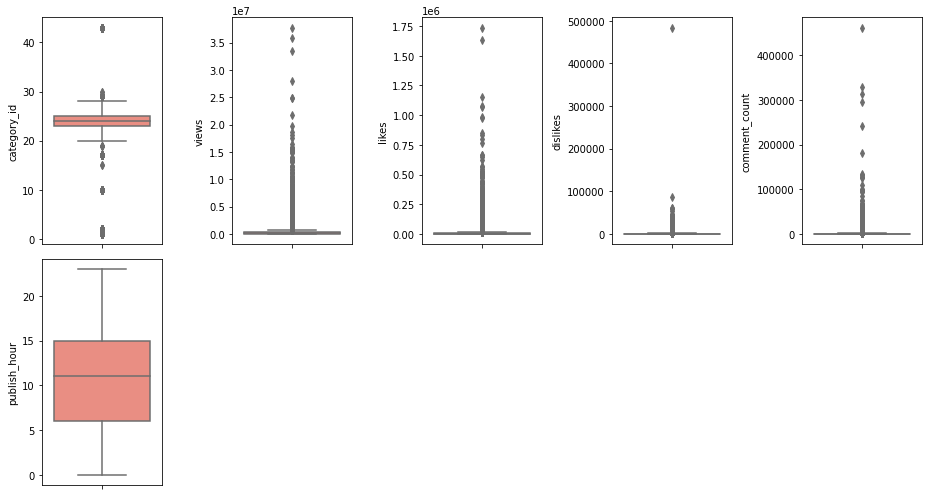

In [ ]:
plt.figure(figsize=(13, 7))
for i, k in enumerate(dfa_num):
  plt.subplot(2, 5, i+1)
  sns.boxplot(y=dfa_num[k], color='salmon', orient = 'v')
  plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

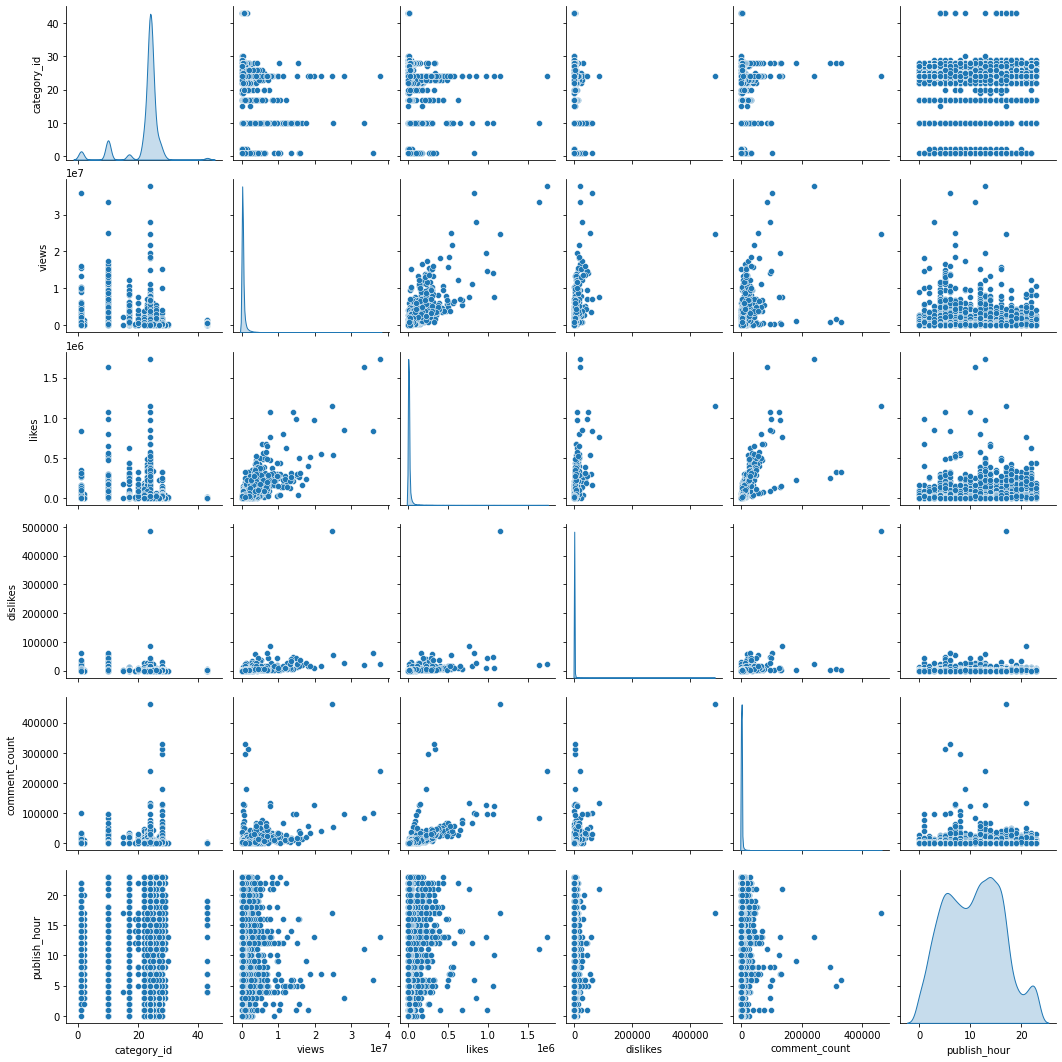

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(dfa, diag_kind='kde')

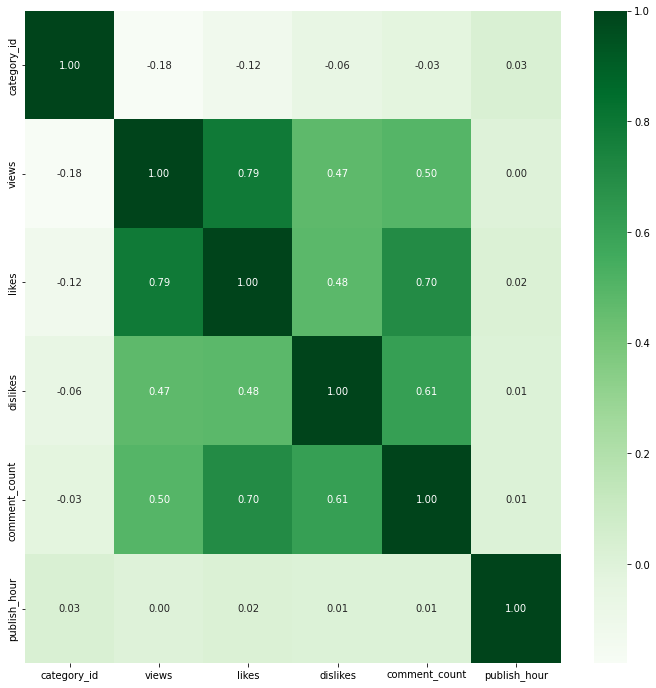

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfa.corr(), cmap='Greens', annot=True, fmt='.2f')

Berdasarkan heatmap, didapatkan korelasi yang cukup kuat dengan target (views):
1. views dan likes = 0.79
2. views dan comment_count = 0.50
3. views dan dislikes = 0.47



In [ ]:
# ax = sns.barplot(x='is_weekend', y='views', data = dfa)
# ax.set_title("Distribution of Publish Time")
# ax.set_ylabel("Total Views")
# ax.set_xlabel("Publish Time")
# plt.tight_layout()

In [ ]:
# ax = sns.barplot(x='is_weekend2', y='views', data = dfa)
# ax.set_title("Distribution of Trending Time")
# ax.set_ylabel("Total Views")
# ax.set_xlabel("Trending Time")
# plt.tight_layout()

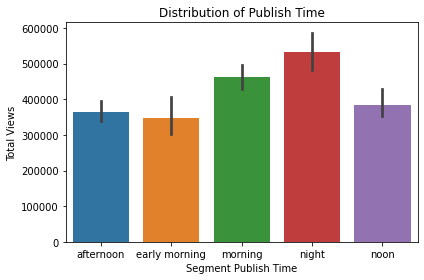

In [ ]:
ax = sns.barplot(x='segment_publish_time', y='views', data = dfa)
ax.set_title("Distribution of Publish Time")
ax.set_ylabel("Total Views")
ax.set_xlabel("Segment Publish Time")
plt.tight_layout()



*   Video dengan viewers terbanyak diupload pada rentang waktu malam hari



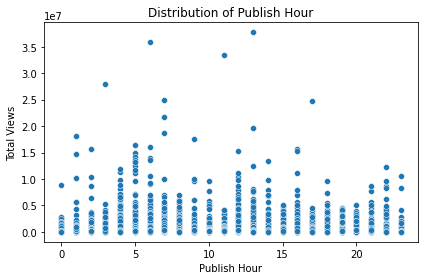

In [ ]:
ax = sns.scatterplot(x='publish_hour', y='views', data = dfa)
ax.set_title("Distribution of Publish Hour")
ax.set_ylabel("Total Views")
ax.set_xlabel("Publish Hour")
plt.tight_layout()

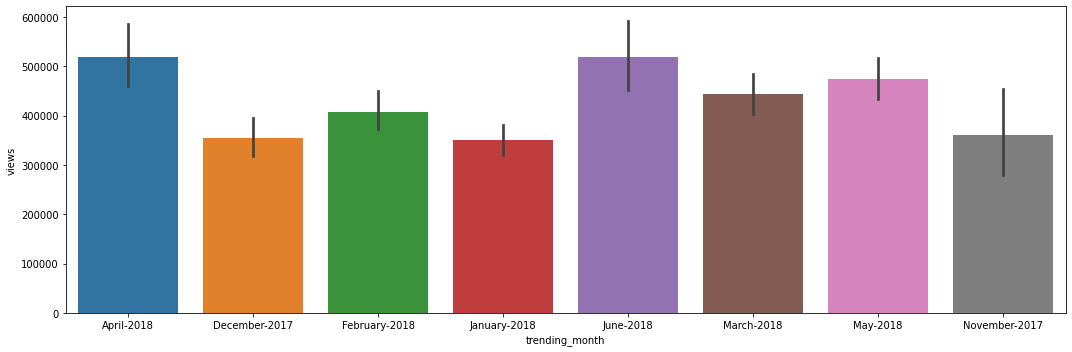

In [ ]:
plt.figure(figsize=(15, 5))
x = sns.barplot(x='trending_month', y='views', data = dfa)
ax.set_title("Distribution of Trending Month")
ax.set_ylabel("Total Views")
ax.set_xlabel("Trending Month")
plt.tight_layout()



*   Video dengan viewers terbanyak berada pada bulan June-2018, April-2018 dan May-2018


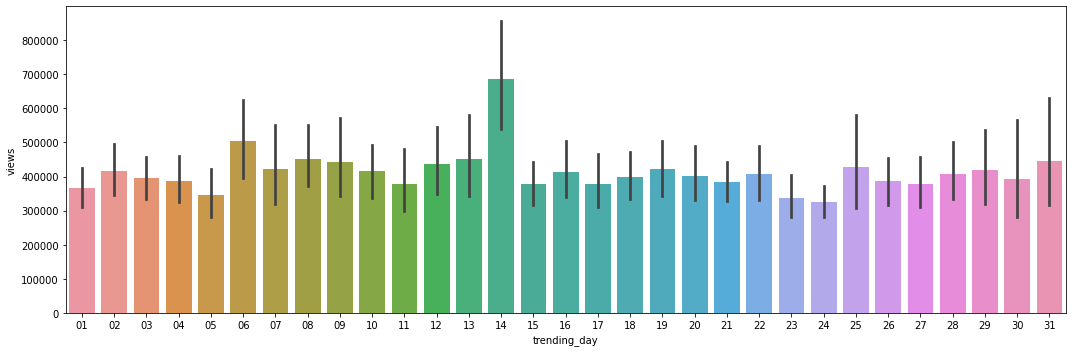

In [ ]:
plt.figure(figsize=(15, 5))
x = sns.barplot(x='trending_day', y='views', data = dfa)
ax.set_title("Distribution of Trending Day")
ax.set_ylabel("Total Views")
ax.set_xlabel("Trending Day")
plt.tight_layout()

In [ ]:
dfa_selected1 = dfa[dfa['trending_month'] == 'June-2018']

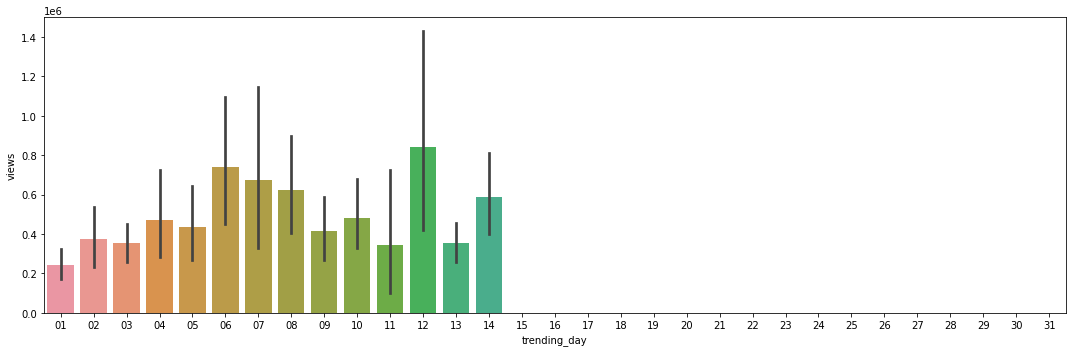

In [ ]:
plt.figure(figsize=(15, 5))
x = sns.barplot(x='trending_day', y='views', data = dfa_selected1)
ax.set_title("Distribution of Trending Day (June 2018")
ax.set_ylabel("Total Views")
ax.set_xlabel("Trending Day")
plt.tight_layout()

In [ ]:
dfa_selected2 = dfa[dfa['trending_month'] == 'April-2018']

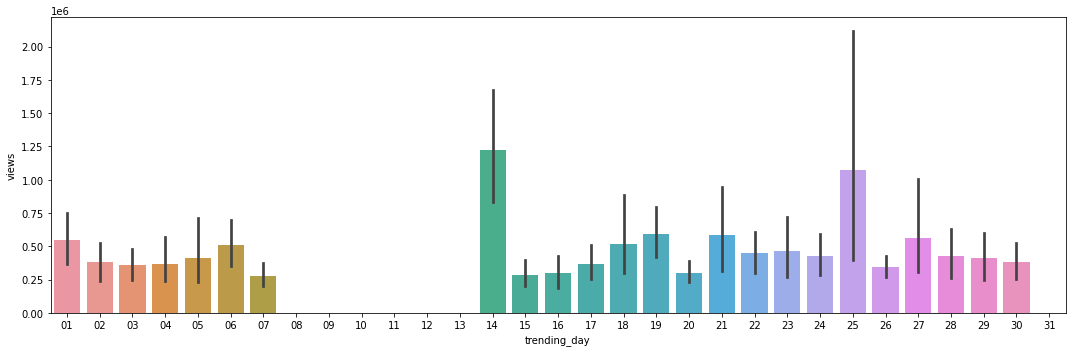

In [ ]:
plt.figure(figsize=(15, 5))
x = sns.barplot(x='trending_day', y='views', data = dfa_selected2)
ax.set_title("Distribution of Trending Day (April 2018")
ax.set_ylabel("Total Views")
ax.set_xlabel("Trending Day")
plt.tight_layout()

In [ ]:
dfa_selected3 = dfa[dfa['trending_month'] == 'May-2018']

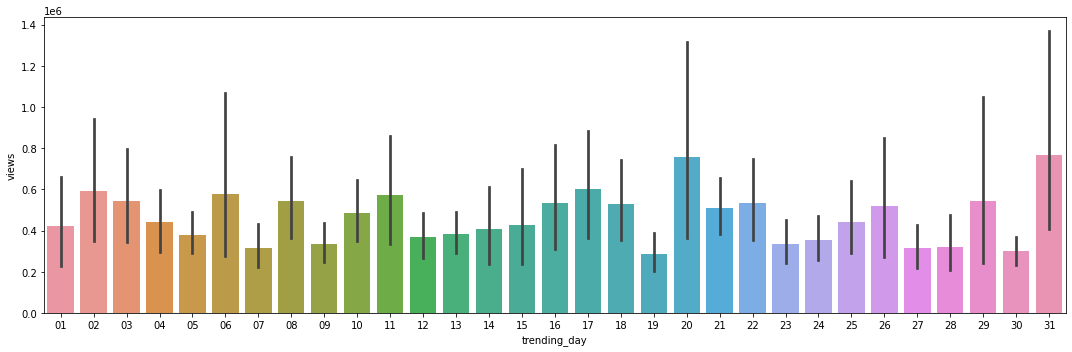

In [ ]:
plt.figure(figsize=(15, 5))
x = sns.barplot(x='trending_day', y='views', data = dfa_selected3)
ax.set_title("Distribution of Trending Day (May 2018")
ax.set_ylabel("Total Views")
ax.set_xlabel("Trending Day")
plt.tight_layout()



*   Dari tanggal upload kita tidak bisa melihat hubungan dengan viewer dikarenakan adanya pola yang berbeda di setiap bulan. Sebagai contoh: plot pada bulan June, April dan May memiliki data upload yang berbeda



<Figure size 720x360 with 0 Axes>

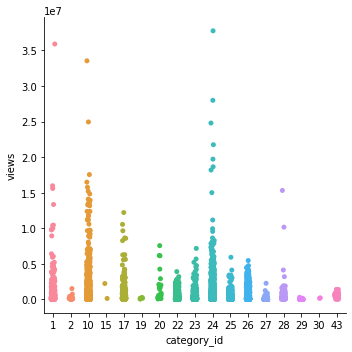

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.catplot(x = 'category_id', y = 'views', data = dfa)
plt.tight_layout()



*   Kategori dengan viewer yang tinggi adalah video dengan kategori 1, 10 dan 24



# Modelling

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [ ]:
dfm = dfa.copy()

In [ ]:
dfm.head()

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,publish_date,segment_views,segment_publish_time,trending_month,trending_day,publish_month,publish_day,publish_hour
0,2017-11-14,Lokdhun Punjabi,1,2021-10-02 12:20:39,1096327,33966,798,882,False,2017-11-12,high,noon,November-2017,14,November-2017,12,12
1,2017-11-14,HJ NEWS,25,2021-10-02 05:43:56,590101,735,904,0,True,2017-11-13,high,morning,November-2017,14,November-2017,13,5
2,2017-11-14,TFPC,24,2021-10-02 15:48:08,473988,2011,243,149,False,2017-11-12,high,afternoon,November-2017,14,November-2017,12,15
3,2017-11-14,Eruma Saani,23,2021-10-02 07:08:48,1242680,70353,1624,2684,False,2017-11-12,high,morning,November-2017,14,November-2017,12,7
4,2017-11-14,Filmylooks,24,2021-10-02 01:14:16,464015,492,293,66,False,2017-11-13,high,early morning,November-2017,14,November-2017,13,1


In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16493 entries, 0 to 36740
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   trending_date         16493 non-null  category      
 1   channel_title         16493 non-null  category      
 2   category_id           16493 non-null  int64         
 3   publish_time          16493 non-null  datetime64[ns]
 4   views                 16493 non-null  int64         
 5   likes                 16493 non-null  int64         
 6   dislikes              16493 non-null  int64         
 7   comment_count         16493 non-null  int64         
 8   comments_disabled     16493 non-null  category      
 9   publish_date          16493 non-null  category      
 10  segment_views         16493 non-null  category      
 11  segment_publish_time  16493 non-null  category      
 12  trending_month        16493 non-null  category      
 13  trending_day    

In [ ]:
dfm['publish_day_name'] = dfm.publish_date.dt.day_name()
dfm['is_weekend'] = dfm['publish_day_name'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
dfm['trending_day_name'] = dfm.trending_date.dt.day_name()
dfm['is_weekend2'] = dfm['trending_day_name'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)

In [ ]:
dfm.head()

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,publish_date,segment_views,segment_publish_time,trending_month,trending_day,publish_month,publish_day,publish_hour,publish_day_name,is_weekend,trending_day_name,is_weekend2
0,2017-11-14,Lokdhun Punjabi,1,2021-10-02 12:20:39,1096327,33966,798,882,False,2017-11-12,high,noon,November-2017,14,November-2017,12,12,Sunday,1,Tuesday,0
1,2017-11-14,HJ NEWS,25,2021-10-02 05:43:56,590101,735,904,0,True,2017-11-13,high,morning,November-2017,14,November-2017,13,5,Monday,0,Tuesday,0
2,2017-11-14,TFPC,24,2021-10-02 15:48:08,473988,2011,243,149,False,2017-11-12,high,afternoon,November-2017,14,November-2017,12,15,Sunday,1,Tuesday,0
3,2017-11-14,Eruma Saani,23,2021-10-02 07:08:48,1242680,70353,1624,2684,False,2017-11-12,high,morning,November-2017,14,November-2017,12,7,Sunday,1,Tuesday,0
4,2017-11-14,Filmylooks,24,2021-10-02 01:14:16,464015,492,293,66,False,2017-11-13,high,early morning,November-2017,14,November-2017,13,1,Monday,0,Tuesday,0


## Feature Encoding

In [ ]:
#label encoding
dfm['comments_disabled_label'] = dfm['comments_disabled'].astype('category').cat.codes
#one hot encoding
cat = ['publish_day_name', 'trending_day_name']
for i in cat:
  onehots = pd.get_dummies(dfm[i], prefix=i)
  dfm = dfm.join(onehots)

In [ ]:
dfm = dfm.drop(columns = ['trending_date', 'channel_title', 'publish_time','publish_date','segment_views','trending_month','publish_month', 'segment_publish_time', 'comments_disabled', 'segment_publish_time', 'publish_day_name', 'trending_day_name'], axis = 1)

In [ ]:
dfm.head()

,category_id,views,likes,dislikes,comment_count,trending_day,publish_day,publish_hour,is_weekend,is_weekend2,comments_disabled_label,publish_day_name_Friday,publish_day_name_Monday,publish_day_name_Saturday,publish_day_name_Sunday,publish_day_name_Thursday,publish_day_name_Tuesday,publish_day_name_Wednesday,trending_day_name_Friday,trending_day_name_Monday,trending_day_name_Saturday,trending_day_name_Sunday,trending_day_name_Thursday,trending_day_name_Tuesday,trending_day_name_Wednesday
0,1,1096327,33966,798,882,14,12,12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,25,590101,735,904,0,14,13,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,24,473988,2011,243,149,14,12,15,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,23,1242680,70353,1624,2684,14,12,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,24,464015,492,293,66,14,13,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
cat = ['trending_day','publish_day']
dfm[cat] = dfm[cat].astype('int32')

## Normalization

In [ ]:
features = dfm.drop(columns = 'views')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    dfm[var]= MinMaxScaler().fit_transform(dfm[var].values.reshape(len(dfm), 1))

In [ ]:
dfm.head()

,category_id,views,likes,dislikes,comment_count,trending_day,publish_day,publish_hour,is_weekend,is_weekend2,comments_disabled_label,publish_day_name_Friday,publish_day_name_Monday,publish_day_name_Saturday,publish_day_name_Sunday,publish_day_name_Thursday,publish_day_name_Tuesday,publish_day_name_Wednesday,trending_day_name_Friday,trending_day_name_Monday,trending_day_name_Saturday,trending_day_name_Sunday,trending_day_name_Thursday,trending_day_name_Tuesday,trending_day_name_Wednesday
0,0.000000,1096327,0.019567,0.001649,0.001909,0.433333,0.366667,0.521739,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.571429,590101,0.000423,0.001868,0.000000,0.433333,0.400000,0.217391,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.547619,473988,0.001158,0.000502,0.000323,0.433333,0.366667,0.652174,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.523810,1242680,0.040528,0.003356,0.005810,0.433333,0.366667,0.304348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.547619,464015,0.000283,0.000605,0.000143,0.433333,0.400000,0.043478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x = dfm.drop(columns = 'views') # feature
y = dfm['views'] #target

In [ ]:
x.shape

(16493, 24)

In [ ]:
x.head()

,category_id,likes,dislikes,comment_count,trending_day,publish_day,publish_hour,is_weekend,is_weekend2,comments_disabled_label,publish_day_name_Friday,publish_day_name_Monday,publish_day_name_Saturday,publish_day_name_Sunday,publish_day_name_Thursday,publish_day_name_Tuesday,publish_day_name_Wednesday,trending_day_name_Friday,trending_day_name_Monday,trending_day_name_Saturday,trending_day_name_Sunday,trending_day_name_Thursday,trending_day_name_Tuesday,trending_day_name_Wednesday
0,0.000000,0.019567,0.001649,0.001909,0.433333,0.366667,0.521739,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.571429,0.000423,0.001868,0.000000,0.433333,0.400000,0.217391,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.547619,0.001158,0.000502,0.000323,0.433333,0.366667,0.652174,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.523810,0.040528,0.003356,0.005810,0.433333,0.366667,0.304348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.547619,0.000283,0.000605,0.000143,0.433333,0.400000,0.043478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y

0        1096327
1         590101
2         473988
3        1242680
4         464015
          ...   
36731    1849399
36734      29536
36735     186197
36738      90643
36740     770873
Name: views, Length: 16493, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42)

In [ ]:
xtrain.shape

(10995, 24)

In [ ]:
xtest.shape

(5498, 24)

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest) #Predicting the prices

In [ ]:
pred

array([909453.61590314, 302534.00658318, 243437.62847266, ...,
       194559.76057585, 211077.50502145, 114575.90963283])

In [ ]:
print('Coefficients: \n', regressor.coef_) # The slope

Coefficients: 
 [-5.75072938e+05  3.47441560e+07  1.65391217e+07 -1.16848081e+07
  2.58769076e+04 -4.80399428e+04 -2.74377541e+04 -7.19791266e+03
 -3.12169545e+04 -6.03332660e+03 -2.30665838e+04 -3.49846324e+04
  1.35797775e+04 -2.07776901e+04 -7.19661374e+04 -2.13480621e+04
 -5.47624601e+04 -1.66469875e+04 -7.68521852e+04 -3.06493174e+03
 -2.81520228e+04 -2.06316699e+04 -1.09432710e+04 -5.70347204e+04]


In [ ]:
print('Intercept: \n', regressor.intercept_) # The Intercept

Intercept: 
 557239.9712584659


In [ ]:
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

MAE: 269105.45
RMSE: 770235.08
R2 score: 0.58


In [ ]:
print("train Accuracy : ",regressor.score(xtrain,ytrain))
print("test Accuracy : ",regressor.score(xtest,ytest))

train Accuracy :  0.6869525366566076
test Accuracy :  0.5808683695576217


## Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

pred = ridge_model.predict(xtest)
eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 279637.20
RMSE: 806435.40
R2 score: 0.54


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.025, 0.05, 0.075, 0.25, 0.5, 0.75, 0.1, 0.3, 1, 2, 5] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [ ]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 270402.21
RMSE: 776337.24
R2 score: 0.57


In [ ]:
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
print('Best fit_intercept:', best_model.best_estimator_.get_params()['fit_intercept'])

Best solver: saga
Best alpha: 0.1
Best fit_intercept: True


In [ ]:
ridge_model = Ridge()
clf = GridSearchCV(ridge_model, hyperparameters, cv=5,scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [ ]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 270393.84
RMSE: 776275.39
R2 score: 0.57


In [ ]:
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
print('Best fit_intercept:', best_model.best_estimator_.get_params()['fit_intercept'])

Best solver: saga
Best alpha: 0.1
Best fit_intercept: True


##Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 269110.03
RMSE: 770269.54
R2 score: 0.58


In [ ]:
xtrain.columns

Index(['category_id', 'likes', 'dislikes', 'comment_count', 'trending_day',
       'publish_day', 'publish_hour', 'is_weekend', 'is_weekend2',
       'comments_disabled_label', 'publish_day_name_Friday',
       'publish_day_name_Monday', 'publish_day_name_Saturday',
       'publish_day_name_Sunday', 'publish_day_name_Thursday',
       'publish_day_name_Tuesday', 'publish_day_name_Wednesday',
       'trending_day_name_Friday', 'trending_day_name_Monday',
       'trending_day_name_Saturday', 'trending_day_name_Sunday',
       'trending_day_name_Thursday', 'trending_day_name_Tuesday',
       'trending_day_name_Wednesday'],
      dtype='object')

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha, selection = selection)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 269105.60
RMSE: 770236.11
R2 score: 0.58


In [ ]:
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
print('Best selection:', best_model.best_estimator_.get_params()['selection'])

Best alpha: 0.03
Best selection: random


## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 430598.04
RMSE: 1187071.26
R2 score: 0.00


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [ ]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 269634.46
RMSE: 772601.44
R2 score: 0.58


In [ ]:
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
print('Best l1_ratio:', best_model.best_estimator_.get_params()['l1_ratio'])

Best alpha: 1e-05
Best l1_ratio: 0.6


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 236583.32
RMSE: 859279.88
R2 score: 0.48


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 184720.21
RMSE: 687689.89
R2 score: 0.67


## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 329882.24
RMSE: 1215075.06
R2 score: -0.04


### Hyperparameter RandomForest

In [ ]:
n_estimators = [10,100]
max_depth = [None,1,3,5, 7, 9, 10]
min_samples_split = [2,4, 6, 8, 10]

hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)

reg = RandomForestRegressor()
clf = RandomizedSearchCV(reg, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [ ]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 202551.87
RMSE: 692592.28
R2 score: 0.66


In [ ]:
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])

Best n_estimators: 100
Best max_depth: 7
Best min_samples_split: 6


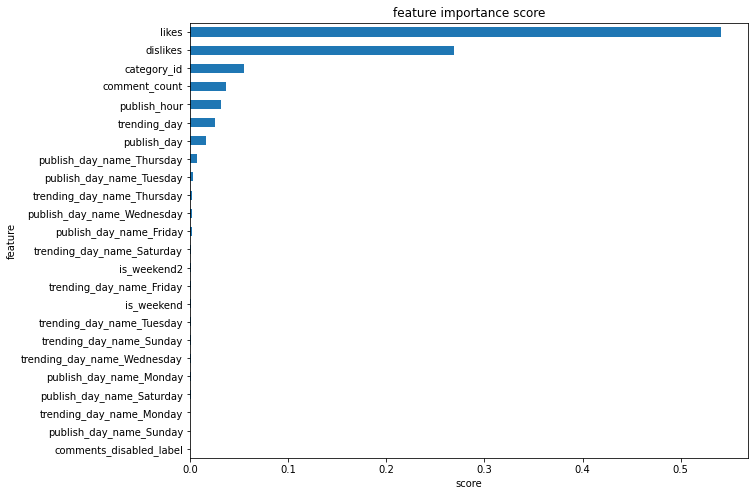

In [111]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

show_feature_importance(rf)

# Kesimpulan

Berdasarkan hasil permodelan yang dilakukan, model yang akan digunakan adalah RandomForestRegressor. Model ini merupakan model terbaik dengan hasil evaluasi RMSE paling kecil (687689.89), dengan nilai R2 score paling besar (0.67) diantara model lainnya.